### Project 3

Refer to the project writeup [here](https://rutgers.app.box.com/s/k5jsawk0jwsprkcha0z2n2tli3pv53l7)


In [7]:
#first create a sample training image. Then worry about how to classify it
#can we use the same training set from task 1 for task 2, provided it's classified correctly
import math
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.colors import ListedColormap, BoundaryNorm

# import xlsxwriter

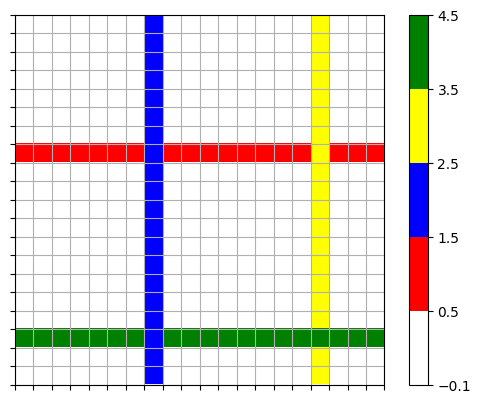

In [28]:
class diagram:
    def __init__(self, data):
        self.data = data #this will be a 20x20 matrix

    @classmethod
    def createDiagram(cls):
        dgrm = cls(np.zeros((20,20), dtype=float))
        return dgrm
    
    def layWires(self):
        possibleRows = [i for i in range(self.data.shape[0])] 
        possibleColumns = [i for i in range(self.data.shape[1])]

        colors = [1,2,3,4] #1 is red, 2 is blue, 3 is yellow, 4 is green
        layRowFirst = random.randrange(2) #0 indicates false, 1 indicates true
        dangerous = 0 #boolean to keep track of whether the diagram is dangerous. #0 means not dangerous, 1 meeans it is dangerous
        thirdWireLaid = 0 #this will hold the color of the 3rd wire laid down
        for i in range(4):
            color = colors.pop(random.randrange(len(colors)))
            
            #if the wire to be laid is yellow and the red wire is already laid, mark diagram as dangerous
            if color == 3 and (1 not in colors): dangerous = 1
            
            if i==2: thirdWireLaid = color
            if i%2 == 0:
                if layRowFirst == 1:
                    row = possibleRows.pop(random.randrange(len(possibleRows)))
                    for j in range(self.data.shape[0]): self.data[row][j] = color
                else:
                    col = possibleColumns.pop(random.randrange(len(possibleColumns)))
                    for j in range(self.data.shape[1]): self.data[j][col] = color
            else:
                if layRowFirst == 1:
                    col = possibleColumns.pop(random.randrange(len(possibleColumns)))
                    for j in range(self.data.shape[1]): self.data[j][col] = color
                else:
                    row = possibleRows.pop(random.randrange(len(possibleRows)))
                    for j in range(self.data.shape[0]): self.data[row][j] = color
        
        return (dangerous,0) if dangerous == 0 else (dangerous,thirdWireLaid)


    def showDiagram(self):
        colors = ['white', 'red', 'blue', 'yellow','green']
        custom_map = ListedColormap(colors)
        bounds = [-.1, .5, 1.5, 2.5, 3.5, 4.5]
        norm = BoundaryNorm(bounds, custom_map.N)
        plt.imshow(self.data, cmap = custom_map, norm=norm)
        
        #Ensure shows plot with increments of 1
        plt.xticks(np.arange(-0.5, self.data.shape[1], 1), labels=[])
        plt.yticks(np.arange(-0.5, self.data.shape[0], 1), labels=[])

        #Show gridlines 
        plt.grid(True)

        #Show colorbar
        plt.colorbar()
        plt.show()

dgrm = diagram.createDiagram()
dgrm.layWires()
dgrm.showDiagram()


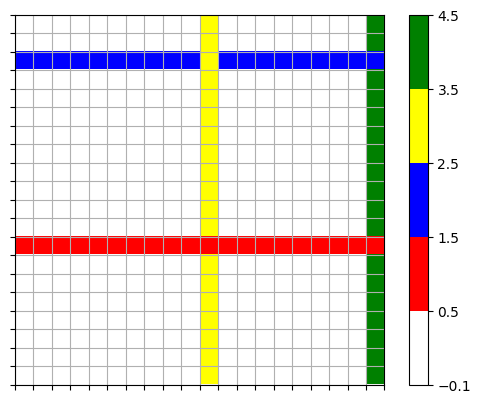

In [29]:
data = np.load('1k_data/data.npy')
labels = np.load('1k_data/labels.npy')

dgrm = diagram(data[0].reshape((20,20)))
dgrm.showDiagram()

In [46]:
np.random.seed(42)
def SGD(w, x, y, alpha):
    # compute estimated output y'
    y_prime = sigmoid(float(np.dot(x,w)))
    # compute Loss of y' compared to y where y is the actual/correct output
    cur_loss = loss(y, y_prime) #+ (1e-10 * np.sum(np.abs(w))) # l2 reg can be changed for the model
    # SGD with new weights = old weights - alpha (sig(w * x) - y)xi) 
    w -= alpha * (y_prime - y) * x
    return cur_loss

def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

def avg_loss(data, w, labels):
    losses = [loss(sigmoid(np.dot(x, w)), y) for x, y in zip(data, labels[:, 0])]
    return np.average(losses)

def loss(actual_y, y_prime):
    epsilon = 1e-15
    return -actual_y * np.log(y_prime+epsilon) - (1-actual_y) * np.log(1-y_prime+epsilon)

def add_polynomial_features(X, degree):
    """Add polynomial features to the input data."""
    features = [X]
    for d in range(2, degree + 1):
        features.append(X**d)
    return np.column_stack(features)


In [91]:
def feed_forward(data,labels, num_iters = 10000):
    data = np.column_stack([data, np.ones(data.shape[0])]) # Adding in a bias term
    samples,features = data.shape
    w = np.random.rand(features)*2 - np.ones(shape=features) #[0,1] -> [-100,100]
    for i in range(num_iters):
        index = np.random.randint(0, 1000)
        x = data[index]
        y = labels[index][0]
        loss = SGD(w, x, y, alpha=0.01)
        
    print(f'Average Loss: {avg_loss(data,w,labels)}, Accuracy on testing set: {accuracy(data, labels, w)}')
    return w

feed_forward(data,labels)

Average Loss: 13.74710077763025, Accuracy on testing set: 0.604


array([ 7.21285327e-01,  7.65119726e-02, -5.91257561e-01, -2.19539329e-01,
        5.62426003e-01,  5.13392002e-01,  1.60101531e-01, -6.57853184e-02,
       -3.99033509e-01, -1.73402185e-01, -4.72468380e-01,  1.90903488e-01,
       -2.75477454e-01,  9.61630359e-01, -3.12933264e-01,  1.66801084e-01,
       -5.11979144e-01, -3.84052670e-01, -3.61664002e-01, -1.36241810e-01,
        1.00001964e+00,  1.13436947e-03, -1.44720939e-01, -8.19183497e-02,
        2.75330092e-01, -5.34092515e-01, -3.54520713e-01, -6.10040112e-01,
       -5.21344812e-01, -5.79457406e-01,  3.96447994e-01,  9.59663943e-01,
       -3.30799434e-01, -4.09059934e-01,  1.09100925e-01,  1.78531067e-01,
        6.73632762e-02,  3.42030842e-01,  4.96069667e-01,  6.43342203e-01,
       -2.76174723e-01,  1.11086766e+00, -6.72095386e-02, -1.21888749e+00,
       -5.32268604e-03,  7.22147109e-01,  3.84849548e-01, -6.38152583e-01,
        7.88191842e-01,  6.32620644e-01,  6.76270035e-02, -3.34634396e-01,
       -5.79817307e-01, -

In [92]:
# Now let's play around with adding non-linear features from our input space
new_inp = add_polynomial_features(data,4)
feed_forward(new_inp,labels,num_iters=20000)

/var/folders/s3/7dcm_x3n32s6xdtw73kmq6k40000gn/T/ipykernel_52678/32717976.py:12: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-z)))


Average Loss: 12.503037054941636, Accuracy on testing set: 0.638


array([ -2.73728011,  -0.1355161 ,   0.75755245, ...,   3.42666376,
       -41.98085156,  -0.7224934 ])

In [51]:
with_sin = np.column_stack([data,])
feed_forward(with_sin,labels,num_iters=20000)

/var/folders/s3/7dcm_x3n32s6xdtw73kmq6k40000gn/T/ipykernel_52678/32717976.py:12: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-z)))


12.2958043965882


In [61]:
def compute_neighborhood_mean(data, window_size):
    image = data.reshape((20,20))
    padded_image = np.pad(image, pad_width=window_size//2, mode='constant')

    neighborhood_means = np.zeros_like(image, dtype=np.float64)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighborhood = padded_image[i:i+window_size, j:j+window_size]
            neighborhood_means[i, j] = np.mean(neighborhood)

    return neighborhood_means

def compute_neighborhood_mean2(image, window_size):
    image = image.reshape((20,20))

    padded_image = np.pad(image, pad_width=window_size//2, mode='constant')

    windowed_view = np.lib.stride_tricks.sliding_window_view(padded_image, (window_size, window_size))

    neighborhood_means = np.mean(windowed_view, axis=(-2, -1))

    return neighborhood_means



True

In [62]:
%%timeit
means = compute_neighborhood_mean2(data[0], 3)

111 µs ± 135 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [63]:
%%timeit
means1 = compute_neighborhood_mean(data[0],3)

4.11 ms ± 29.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [64]:
def add_neighborhood_feature(data, window_size=3):
    new_data = [] # store all the new data points in here
    for i in range(data.shape[0]): #i.e for each data point
        means = compute_neighborhood_mean2(data[i], window_size)
        new_data.append(np.concatenate((data[i], means.flatten())))
    return np.array(new_data)

print(data.shape)
new = add_neighborhood_feature(data)
print(new.shape)

        

(1000, 400)
(1000, 800)


In [93]:
feed_forward(new, labels, num_iters=100000)

Average Loss: 10.229225812698015, Accuracy on testing set: 0.73


array([-2.29861927e-01,  1.06249047e-01, -2.70887192e-01, -4.32708977e-01,
        4.76265576e-01,  9.54428837e-01,  6.05584766e-01,  5.84350337e-02,
       -5.25762932e-02,  9.53433366e-02, -8.53578415e-01,  1.12996372e+00,
       -5.26239492e-01,  1.45022049e+00,  3.07020080e-01, -1.69617224e-01,
       -8.45507033e-02, -2.28807139e+00, -6.29519410e-01, -1.87728103e-01,
        9.31823609e-01, -1.47668576e-01,  4.00951816e-01, -6.01158509e-01,
        1.19380712e+00, -8.63400021e-01, -9.49208014e-01,  2.04650893e-02,
        6.87548098e-01, -4.43941294e-01, -1.89536540e-01,  1.00335164e+00,
       -1.51761146e-01,  5.53568575e-01, -6.94315686e-01, -8.56373419e-03,
        2.66176219e-01, -7.14474078e-01, -3.79937012e-01,  7.83613267e-02,
       -6.44022243e-01,  1.00126091e+00, -1.88003576e-01, -7.94213576e-01,
       -7.09229543e-01,  6.83415277e-01,  1.11741079e-01, -1.14120836e+00,
        1.07452937e+00,  1.14825739e+00,  1.02041185e-01, -1.58876217e-01,
        3.62315746e-01,  

In [77]:
new2 = add_neighborhood_feature(data,window_size=6)
new3 = add_polynomial_features(new2, degree=3)

In [94]:
weights = feed_forward(new3, labels, num_iters=1000000)

/var/folders/s3/7dcm_x3n32s6xdtw73kmq6k40000gn/T/ipykernel_52678/32717976.py:12: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-z)))


Average Loss: 7.489711472686093, Accuracy on testing set: 0.783


In [90]:
def accuracy(data, labels, weights):
    outs = np.dot(data, weights)
    binary = (outs >= 0.5).astype(int)

    samples = data.shape[0]
    correct = sum(binary == labels[:,0])
    return correct/samples
